In [1]:
import pandas as pd

第一步，读取数据，进行融合，并处理异常值

In [3]:
#read the data of user and data, 2 key data of the movielens100k,since there is no column name,we need to add them according to the instructions
#首先对用户部分进行处理
data_colname=["user id","item id","rating","timestamp"]
user_colname=["user id","age","gender","occupation","zip code"]
u_data = pd.read_csv('ml-100k\\ml-100k\\u.data',sep="\t",names=data_colname,encoding='utf-8')
u_user = pd.read_csv('ml-100k\\ml-100k\\u.user',sep="|",names=user_colname,encoding='utf-8')
print(u_data.head())
print(u_data.describe())
print(u_user.head())
print(u_user.describe())

   user id  item id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
            user id        item id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08
   user id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   2

In [4]:
#Check if we have null value in the dataset and other outline values
print(u_data.isnull().sum().sum())
print(u_user.isnull().sum().sum())
out = u_data[(u_data['rating'] <= 0) | (u_data['rating'] > 5)]
print(out.index)
nones = u_user[u_user['occupation'] == 'none']
print(nones.index)
u_user= u_user.drop(nones.index)

0
0
Index([], dtype='int64')
Index([56, 126, 129, 255, 288, 417, 627, 656, 755], dtype='int64')


In [32]:
#merge 2 table
merge_userdata=pd.merge(left=u_data,right=u_user,how='left',on='user id')
print(merge_userdata.isnull().sum())
missing_rows = merge_userdata[merge_userdata.isnull().any(axis=1)]
missing_user_ids = missing_rows['user id']
missing_in_u_user = ~missing_user_ids.isin(u_user['user id'])
print("Merge DataFrame with missing values:")
print(missing_rows)
print("\nUser IDs with missing values not in u_user:")
print(missing_user_ids[missing_in_u_user])
merge_userdata_clean = merge_userdata.dropna()
merge_userdata_clean.to_csv("merge1.csv")
merge_userdata_clean

user id         0
item id         0
rating          0
timestamp       0
age           901
gender        901
occupation    901
zip code      901
dtype: int64
Merge DataFrame with missing values:
       user id  item id  rating  timestamp  age gender occupation zip code
68          57      304       5  883698581  NaN    NaN        NaN      NaN
79         127      229       5  884364867  NaN    NaN        NaN      NaN
151         57      419       3  883698454  NaN    NaN        NaN      NaN
194        130      379       4  875801662  NaN    NaN        NaN      NaN
199        130      216       4  875216545  NaN    NaN        NaN      NaN
...        ...      ...     ...        ...  ...    ...        ...      ...
99513       57      121       4  883697432  NaN    NaN        NaN      NaN
99597      657      258       2  884238559  NaN    NaN        NaN      NaN
99932      130      824       3  875801830  NaN    NaN        NaN      NaN
99950      130       93       5  874953665  NaN    NaN  

,user id,item id,rating,timestamp,age,gender,occupation,zip code
0,196,242,3,881250949,49.0,M,writer,55105
1,186,302,3,891717742,39.0,F,executive,00000
2,22,377,1,878887116,25.0,M,writer,40206
3,244,51,2,880606923,28.0,M,technician,80525
4,166,346,1,886397596,47.0,M,educator,55113
...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,13.0,M,student,83702
99996,716,204,5,879795543,36.0,F,administrator,44265
99997,276,1090,1,874795795,21.0,M,student,95064
99998,13,225,2,882399156,47.0,M,educator,29206


In [51]:
#read the file of the movie information
item_colname = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 
           'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 
           'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
           'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
u_item = pd.read_csv('ml-100k\\ml-100k\\u.item',sep="|",names=item_colname,encoding='latin1')
print(u_item.describe())
u_item.head()

          movie_id  video_release_date      unknown       Action    Adventure  \
count  1682.000000                 0.0  1682.000000  1682.000000  1682.000000   
mean    841.500000                 NaN     0.001189     0.149227     0.080262   
std     485.695893                 NaN     0.034473     0.356418     0.271779   
min       1.000000                 NaN     0.000000     0.000000     0.000000   
25%     421.250000                 NaN     0.000000     0.000000     0.000000   
50%     841.500000                 NaN     0.000000     0.000000     0.000000   
75%    1261.750000                 NaN     0.000000     0.000000     0.000000   
max    1682.000000                 NaN     1.000000     1.000000     1.000000   

         Animation     Children       Comedy        Crime  Documentary  ...  \
count  1682.000000  1682.000000  1682.000000  1682.000000  1682.000000  ...   
mean      0.024970     0.072533     0.300238     0.064804     0.029727  ...   
std       0.156081     0.259445  

,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
#reconstruct the feature
u_item['release_date'] = u_item['title'].str.extract(r'\((\d{4})\)')
u_item['title'] = u_item['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()
u_item.drop(columns=['video_release_date', 'IMDb_URL'], inplace=True)
u_item.head()

,movie_id,title,release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [53]:
#deal with nan value
print(u_item.isnull().sum().sum())
missing_values_df = u_item[u_item.isnull().any(axis=1)]
print(missing_values_df)
u_item = u_item.drop(index=266)
print(u_item.isnull().sum().sum())

1
     movie_id    title release_date  unknown  Action  Adventure  Animation  \
266       267  unknown          NaN        1       0          0          0   

     Children  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  Musical  \
266         0       0      0  ...        0          0       0        0   

     Mystery  Romance  Sci-Fi  Thriller  War  Western  
266        0        0       0         0    0        0  

[1 rows x 22 columns]
0


In [54]:
#merge all 3 tables,this will be a table we can use for training
u_item.rename(columns={'movie_id': 'item id'}, inplace=True)
merge_data=pd.merge(left=merge_userdata_clean,right=u_item,how='left',on='item id')
print(merge_data.isnull().sum())
missing_rows = merge_data[merge_data.isnull().any(axis=1)]
print("Merge DataFrame with missing values:")
print(missing_rows)
merge_data.dropna(inplace=True)
print(merge_data.isnull().sum().sum())
merge_data.to_csv("merge2.csv")
merge_data

user id         0
item id         0
rating          0
timestamp       0
age             0
gender          0
occupation      0
zip code        0
title           8
release_date    8
unknown         8
Action          8
Adventure       8
Animation       8
Children        8
Comedy          8
Crime           8
Documentary     8
Drama           8
Fantasy         8
Film-Noir       8
Horror          8
Musical         8
Mystery         8
Romance         8
Sci-Fi          8
Thriller        8
War             8
Western         8
dtype: int64
Merge DataFrame with missing values:
       user id  item id  rating  timestamp   age gender     occupation  \
3700         5      267       4  875635064  33.0      F          other   
7092       268      267       3  875742077  24.0      M       engineer   
12244      297      267       3  875409139  29.0      F       educator   
14479      319      267       4  875707690  38.0      M     programmer   
15012        1      267       4  875692955  24.0      M   

,user id,item id,rating,timestamp,age,gender,occupation,zip code,title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49.0,M,writer,55105,Kolya,1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,186,302,3,891717742,39.0,F,executive,00000,L.A. Confidential,1997,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,22,377,1,878887116,25.0,M,writer,40206,Heavyweights,1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,244,51,2,880606923,28.0,M,technician,80525,Legends of the Fall,1994,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,166,346,1,886397596,47.0,M,educator,55113,Jackie Brown,1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99094,880,476,3,880175444,13.0,M,student,83702,"First Wives Club, The",1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99095,716,204,5,879795543,36.0,F,administrator,44265,Back to the Future,1985,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99096,276,1090,1,874795795,21.0,M,student,95064,Sliver,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99097,13,225,2,882399156,47.0,M,educator,29206,101 Dalmatians,1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


第二步，进行一些简单的可视化

In [2]:
import pandas as pd
merge_data=pd.read_csv("merge2.csv")
merge_data.drop(merge_data.columns[0], axis=1,inplace=True)
merge_data

,user id,item id,rating,timestamp,age,gender,occupation,zip code,title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49.0,M,writer,55105,Kolya,1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,186,302,3,891717742,39.0,F,executive,00000,L.A. Confidential,1997,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,22,377,1,878887116,25.0,M,writer,40206,Heavyweights,1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,244,51,2,880606923,28.0,M,technician,80525,Legends of the Fall,1994,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,166,346,1,886397596,47.0,M,educator,55113,Jackie Brown,1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99086,880,476,3,880175444,13.0,M,student,83702,"First Wives Club, The",1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99087,716,204,5,879795543,36.0,F,administrator,44265,Back to the Future,1985,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99088,276,1090,1,874795795,21.0,M,student,95064,Sliver,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99089,13,225,2,882399156,47.0,M,educator,29206,101 Dalmatians,1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


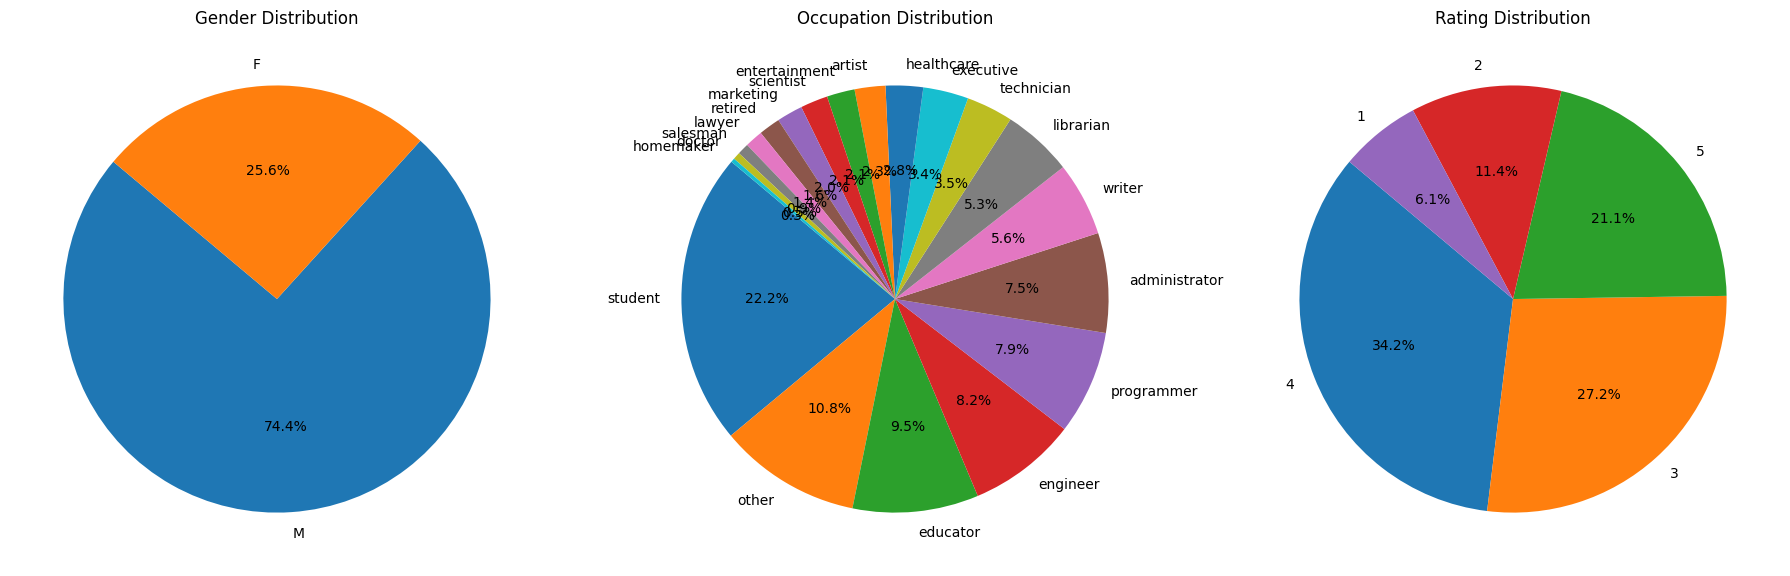

In [7]:
import matplotlib.pyplot as plt
#using pie plot to see the distribution
gender_counts = merge_data['gender'].value_counts()
occupation_counts = merge_data['occupation'].value_counts()
rating_counts = merge_data['rating'].value_counts()
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Gender Distribution')
axes[1].pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Occupation Distribution')
axes[2].pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Rating Distribution')

plt.tight_layout()
plt.show()

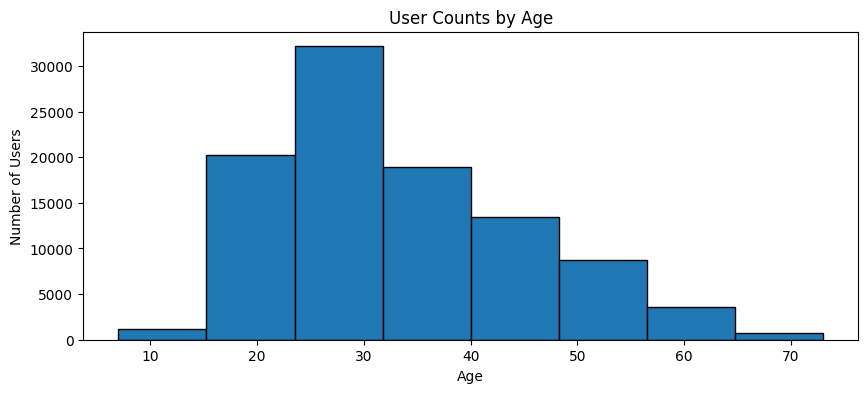

In [12]:
# by age
users_by_age = merge_data['age']
plt.figure(figsize=(10, 4))
plt.hist(users_by_age, bins=8, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('User Counts by Age')
plt.show()

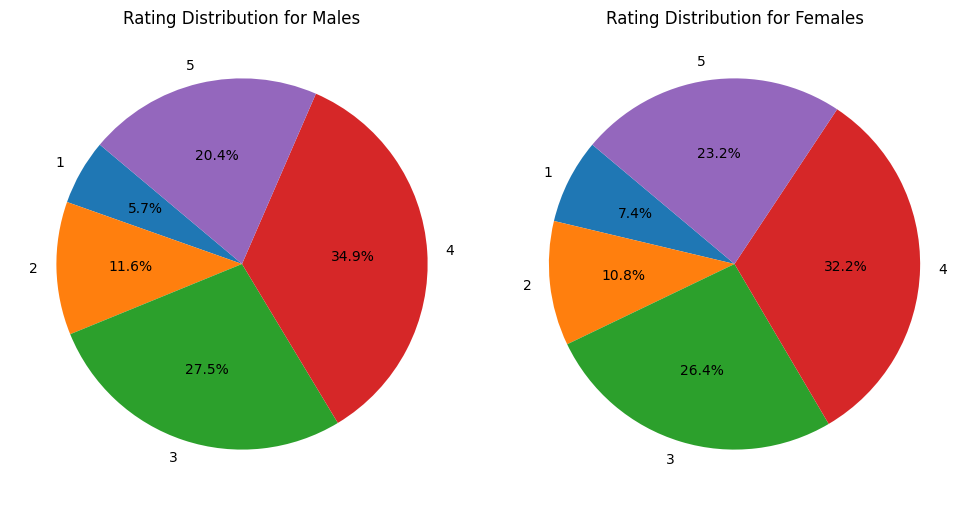

In [9]:
rating_by_gender = merge_data.groupby('gender')['rating'].value_counts().unstack().fillna(0)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

male_ratings = rating_by_gender.loc['M']
axes[0].pie(male_ratings, labels=male_ratings.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Rating Distribution for Males')
female_ratings = rating_by_gender.loc['F']
axes[1].pie(female_ratings, labels=female_ratings.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Rating Distribution for Females')

plt.tight_layout()
plt.show()

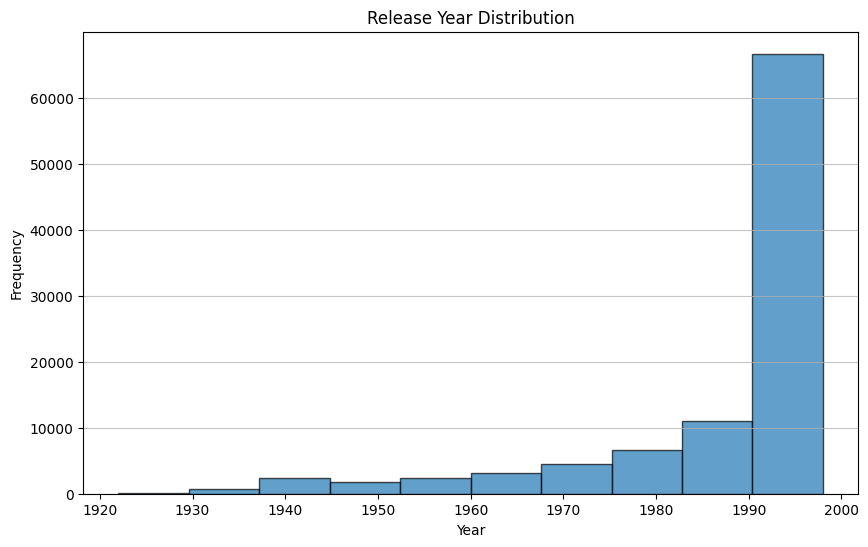

In [14]:
plt.figure(figsize=(10, 6)) 
plt.hist(merge_data['release_date'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Release Year Distribution')
plt.grid(axis='y', alpha=0.75)
plt.show()

<Figure size 1200x800 with 0 Axes>

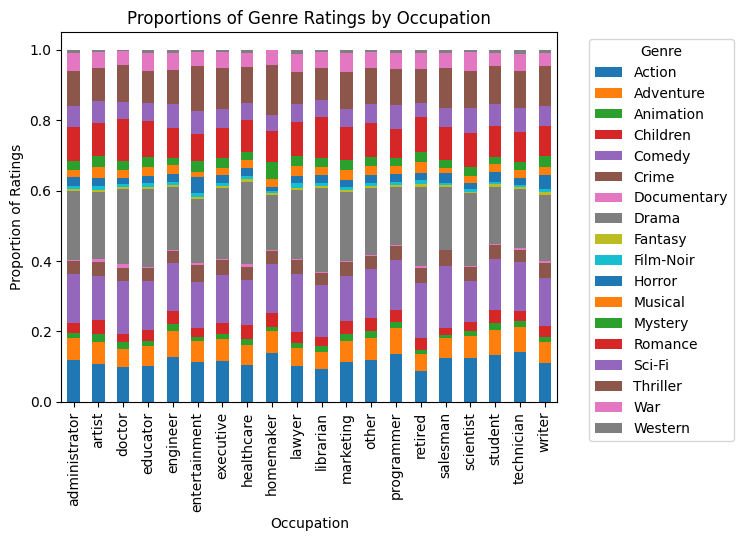

In [6]:
#user analysis by occupation
genre_columns = ['Action', 'Adventure', 'Animation', "Children", 'Comedy', 'Crime', 'Documentary', 'Drama',
                 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
                 'Western']

genre_by_occupation = merge_data.groupby('occupation')[genre_columns].sum()
total_ratings_by_occupation = genre_by_occupation.sum(axis=1)
genre_proportions_by_occupation = genre_by_occupation.divide(total_ratings_by_occupation, axis=0)
 
plt.figure(figsize=(12, 8))
genre_proportions_by_occupation.plot(kind='bar', stacked=True)
plt.title('Proportions of Genre Ratings by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Proportion of Ratings')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x800 with 0 Axes>

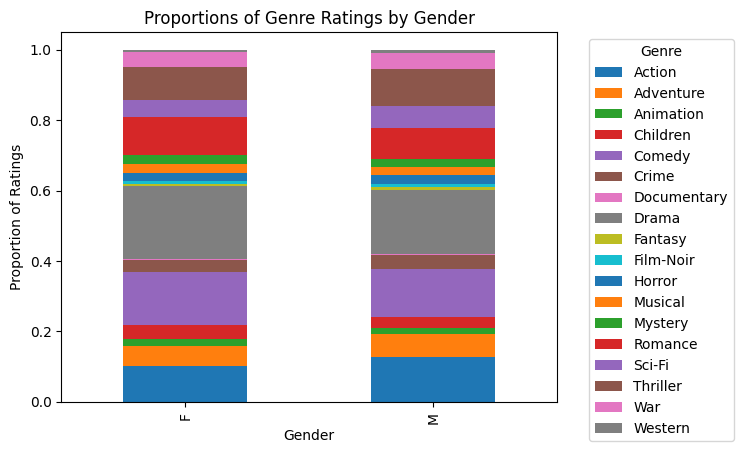

In [8]:
#user analysis by gender
genre_by_occupation = merge_data.groupby('gender')[genre_columns].sum()
total_ratings_by_occupation = genre_by_occupation.sum(axis=1)
genre_proportions_by_occupation = genre_by_occupation.divide(total_ratings_by_occupation, axis=0)
 
plt.figure(figsize=(12, 8))
genre_proportions_by_occupation.plot(kind='bar', stacked=True)
plt.title('Proportions of Genre Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Ratings')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\15402\AppData\Local\Temp\ipykernel_7568\467052413.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_by_age_group = merge_data.groupby(age_bins)[genre_columns].sum()


<Figure size 1200x800 with 0 Axes>

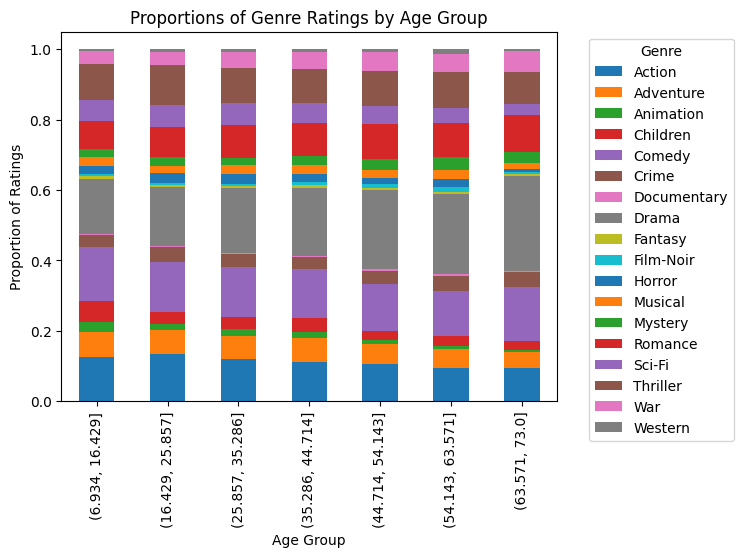

In [11]:
#user analysis by Age
age_bins = pd.cut(merge_data['age'], bins=7)
genre_by_age_group = merge_data.groupby(age_bins)[genre_columns].sum()
total_ratings_by_age_group = genre_by_age_group.sum(axis=1)
genre_proportions_by_age_group = genre_by_age_group.divide(total_ratings_by_age_group, axis=0)
plt.figure(figsize=(12, 8))
genre_proportions_by_age_group.plot(kind='bar', stacked=True)
plt.title('Proportions of Genre Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Ratings')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\15402\AppData\Local\Temp\ipykernel_7568\3200550233.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings_by_date_group = merge_data.groupby(date_bins)['rating'].mean()


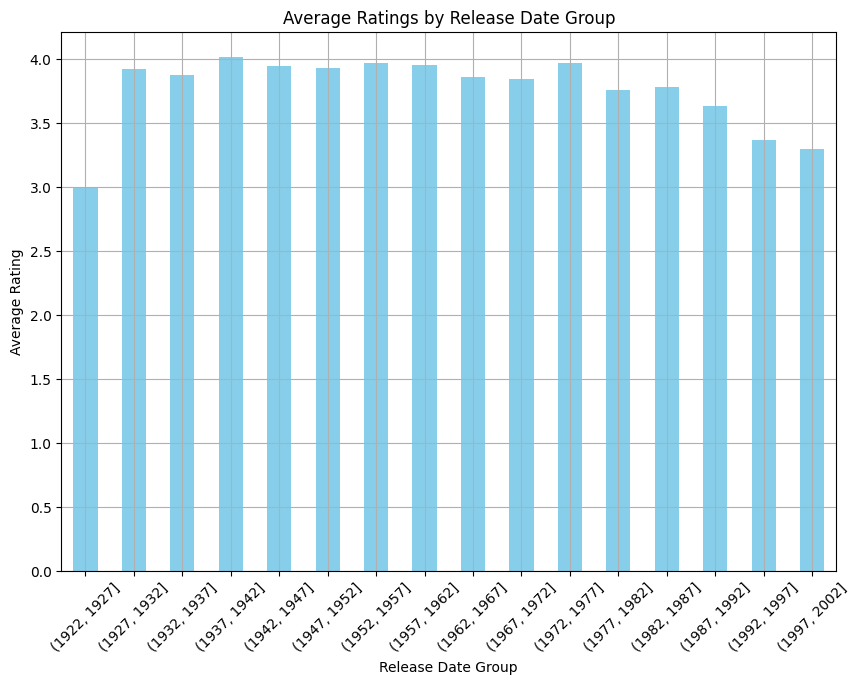

In [35]:
min_date = int(merge_data['release_date'].min())
max_date = int(merge_data['release_date'].max())
bins = list(range(min_date, max_date + (max_date - min_date) // 14, (max_date - min_date) // 14))
date_bins = pd.cut(merge_data['release_date'], bins=bins)
average_ratings_by_date_group = merge_data.groupby(date_bins)['rating'].mean()
plt.figure(figsize=(10, 7))
average_ratings_by_date_group.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Release Date Group')
plt.xlabel('Release Date Group')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\15402\AppData\Local\Temp\ipykernel_7568\962289927.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings_by_date_group = merge_data.groupby(date_bins)['rating'].mean()


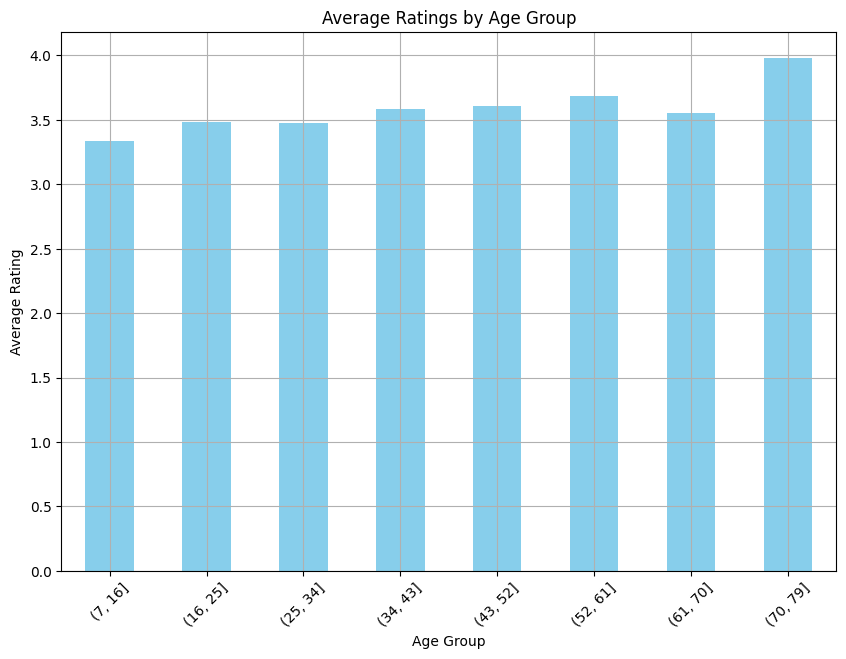

In [70]:
min_date = int(merge_data['age'].min())
max_date = int(merge_data['age'].max())
bins = list(range(min_date, max_date + (max_date - min_date) // 7, (max_date - min_date) // 7))
date_bins = pd.cut(merge_data['age'], bins=bins)
average_ratings_by_date_group = merge_data.groupby(date_bins)['rating'].mean()
plt.figure(figsize=(10, 7))
average_ratings_by_date_group.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

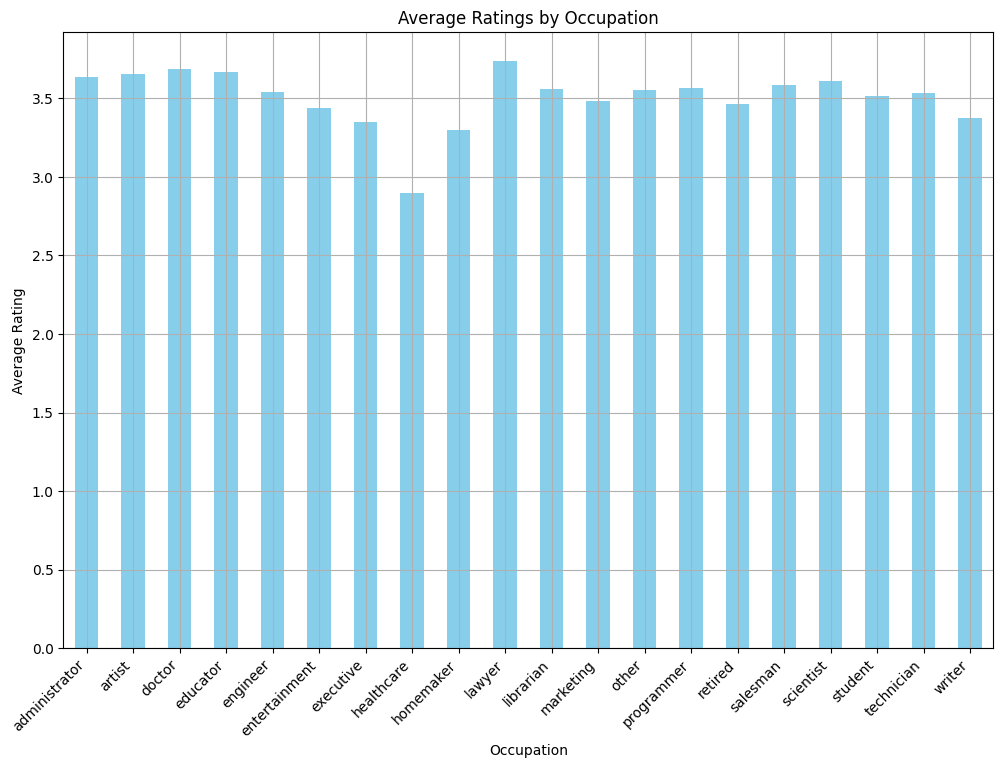

In [13]:
average_ratings_by_occupation = merge_data.groupby('occupation')['rating'].mean()

# 绘制条形图
plt.figure(figsize=(12, 8))
average_ratings_by_occupation.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [9]:
def occupations_map(occupation):
    occupations_dict = {
     'other': 0,
     'technician': 1,
     'writer': 2,
     'executive': 3,
     'administrator': 4,
     'student': 5,
     'lawyer': 6,
     'educator': 7,
     'scientist': 8,
     'entertainment': 9,
     'programmer': 10,
     'librarian': 11,
     'homemaker': 12,
     'artist': 13,
     'engineer': 14,
     'marketing': 15,
     'none': 16,
     'healthcare': 17,
     'retired': 18,
     'salesman': 19,
     'doctor': 20}
    return occupations_dict[occupation]

C:\Users\15402\AppData\Local\Temp\ipykernel_4296\2974977691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['gender'] = data_subset['gender'].map({'M': 0, 'F': 1})
C:\Users\15402\AppData\Local\Temp\ipykernel_4296\2974977691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['occupation'] = data_subset['occupation'].apply(lambda occupation : occupations_map(occupation))


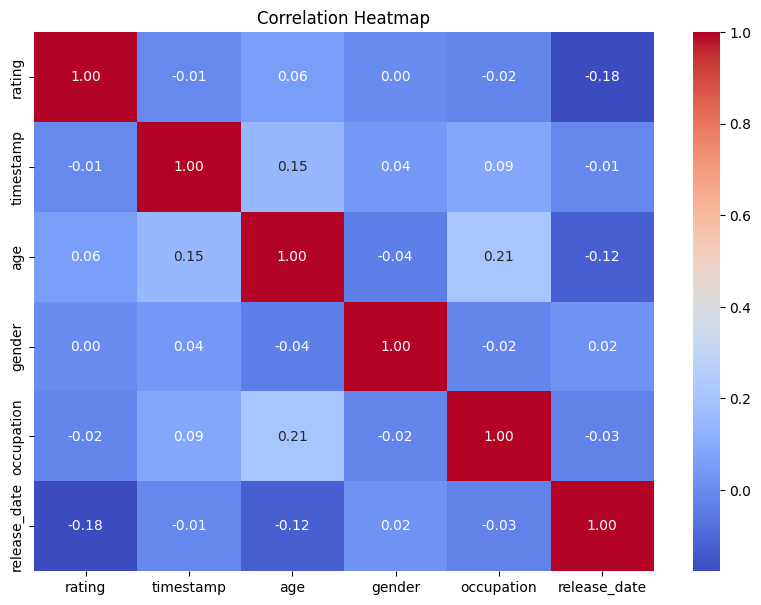

In [10]:
import seaborn as sns
selected_columns = ['rating', 'timestamp', 'age', 'gender', 'occupation','release_date']
data_subset = merge_data[selected_columns]
data_subset['gender'] = data_subset['gender'].map({'M': 0, 'F': 1})
data_subset['occupation'] = data_subset['occupation'].apply(lambda occupation : occupations_map(occupation))
correlation_matrix = data_subset.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\15402\AppData\Local\Temp\ipykernel_10172\2567023958.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['cluster'] = kmeans.labels_


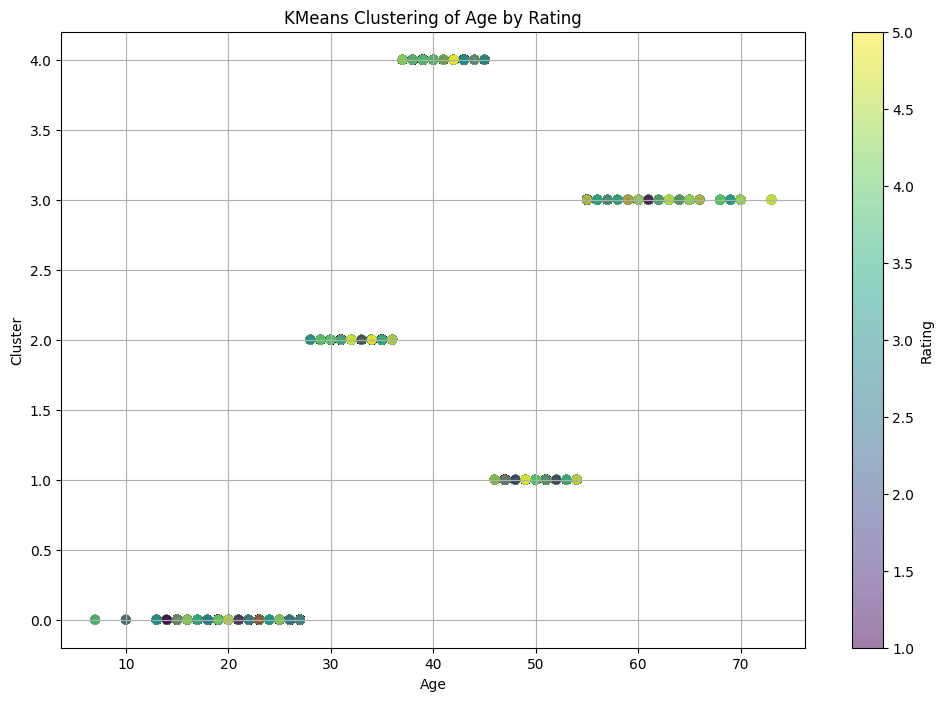

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = data_subset[['age']]
kmeans = KMeans(n_clusters=5, random_state=42)  # 假设分为 5 个簇
kmeans.fit(X)
data_subset['cluster'] = kmeans.labels_
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_subset['age'], data_subset['cluster'], c=data_subset['rating'], cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering of Age by Rating')
plt.xlabel('Age')
plt.ylabel('Cluster')
plt.colorbar(scatter, label='Rating')
plt.grid(True)
plt.show()

C:\Users\15402\AppData\Local\Temp\ipykernel_7568\1202679953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['cluster'] = kmeans.labels_


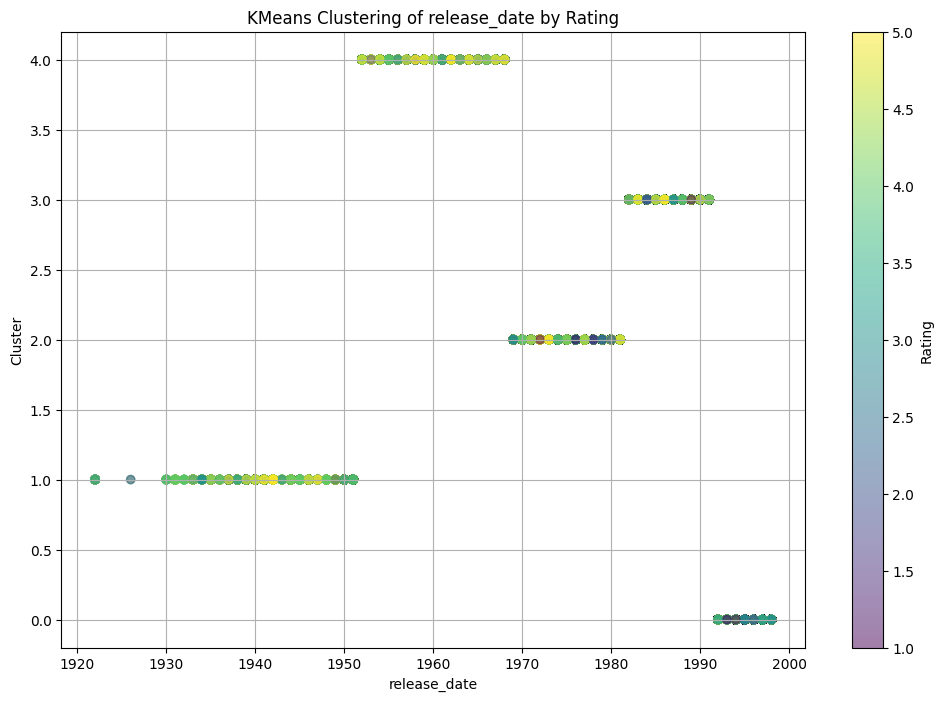

In [71]:
X = data_subset[['release_date']]
kmeans = KMeans(n_clusters=5, random_state=42)  # 假设分为 5 个簇
kmeans.fit(X)
data_subset['cluster'] = kmeans.labels_
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_subset['release_date'], data_subset['cluster'], c=data_subset['rating'], cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering of release_date by Rating')
plt.xlabel('release_date')
plt.ylabel('Cluster')
plt.colorbar(scatter, label='Rating')
plt.grid(True)
plt.show()

C:\Users\15402\AppData\Local\Temp\ipykernel_7568\2537285404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['cluster'] = kmeans.labels_


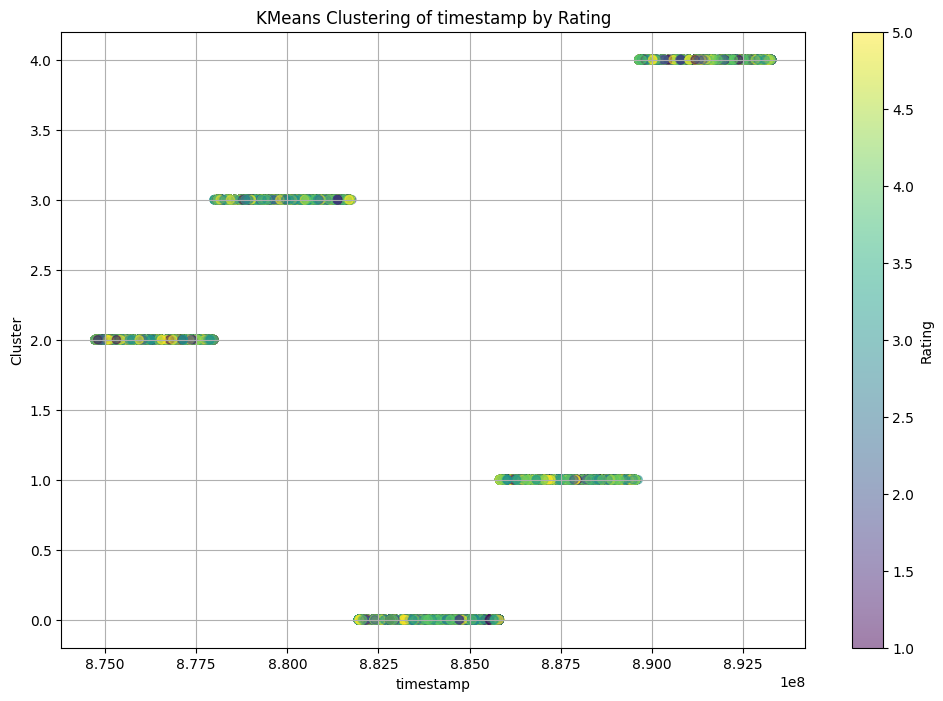

In [75]:
X = data_subset[['timestamp']]
kmeans = KMeans(n_clusters=5, random_state=42)  # 假设分为 5 个簇
kmeans.fit(X)
data_subset['cluster'] = kmeans.labels_
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_subset['timestamp'], data_subset['cluster'], c=data_subset['rating'], cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering of timestamp by Rating')
plt.xlabel('timestamp')
plt.ylabel('Cluster')
plt.colorbar(scatter, label='Rating')
plt.grid(True)
plt.show()

C:\Users\15402\AppData\Local\Temp\ipykernel_4296\526813130.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['cluster'] = kmeans.labels_


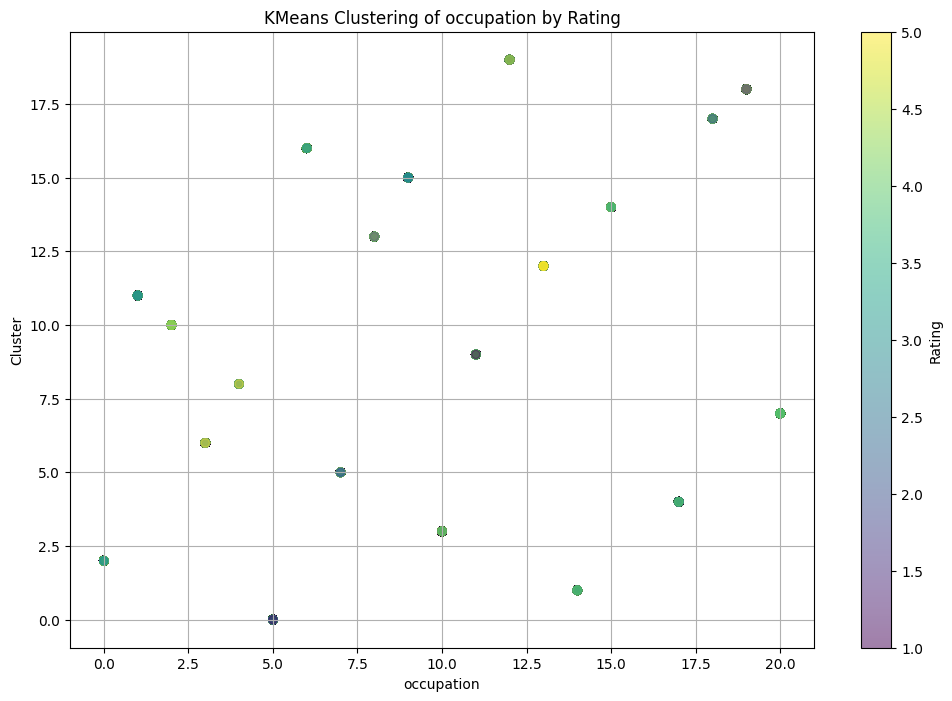

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = data_subset[['occupation']]
kmeans = KMeans(n_clusters=20, random_state=42)  # 假设分为 5 个簇
kmeans.fit(X)
data_subset['cluster'] = kmeans.labels_
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_subset['occupation'], data_subset['cluster'], c=data_subset['rating'], cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering of occupation by Rating')
plt.xlabel('occupation')
plt.ylabel('Cluster')
plt.colorbar(scatter, label='Rating')
plt.grid(True)
plt.show()